Постановка задачи классификации
Классификация — один из разделов машинного обучения, посвященный решению следующей задачи. Имеется множество объектов (ситуаций), разделённых некоторым образом на классы. Задано конечное множество объектов, для которых известно, к каким классам они относятся. Это множество называется обучающей выборкой. Классовая принадлежность остальных объектов не известна. Требуется построить алгоритм, способный классифицировать произвольный объект из исходного множества.
Классифицировать объект — значит, указать номер (или наименование класса), к которому относится данный объект.

Классификация объекта — номер или наименование класса, выдаваемый алгоритмом классификации в результате его применения к данному конкретному объекту.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
import sklearn

Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве.

Расстояние Евклида между a1 и a2: 3.742
Квадрат Евклидова расстояния между a2 и a3: 78.0
Расстояние Чебышева между a3 и a4: 3.0
Расстояние Хемминга между a2 и a4: 5.0


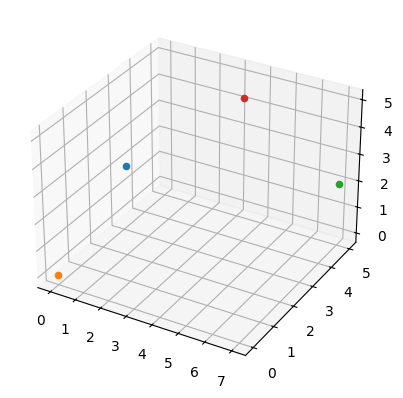

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

a = np.array([[1, 2, 3], [0, 0, 0], [7, 5, 2], [4, 4, 5]])

print('Расстояние Евклида между a1 и a2:', (np.linalg.norm(a[0] - a[1]).round(3)))
print('Квадрат Евклидова расстояния между a2 и a3:', ((np.linalg.norm(a[1] - a[2]) ** 2).round(3)))
print('Расстояние Чебышева между a3 и a4:', (np.linalg.norm(a[2] - a[3], ord=np.inf)))
print('Расстояние Хемминга между a2 и a4:', (np.linalg.norm(a[1] - a[3], ord=np.inf)))

for i in range(0,4):
    ax.scatter(a[i, 0], a[i, 1], a[i, 2])

plt.show()

2.1. Теоретический материал – Задачи классификации

Метод k-ближайших соседей используется для решения задачи классификации. Он относит объекты к классу, которому принадлежит большинство из k его ближайших соседей в многомерном пространстве признаков. Это один из простейших алгоритмов обучения классификационных моделей. Число k – это количество соседних объектов в пространстве признаков, которые сравниваются с классифицируемым объектом. Иными словами, если k=10, то каждый объект сравнивается с 10-ю соседями. В процессе обучения алгоритм просто запоминает все векторы признаков и соответствующие им метки классов. При работе с реальными данными, т.е. наблюдениями, метки класса которых неизвестны, вычисляется расстояние между вектором нового наблюдения и ранее запомненными. Затем выбирается k ближайших к нему векторов, и новый объект относится к классу, которому принадлежит большинство из них. Приведем алгоритм метода.
Выберите значение K соседей (скажем, k = 5)
Найдите ближайшую точку данных K (5) для нашей новой точки данных на основе евклидова расстояния (которое мы обсудим позже)
Среди этих K точек данных подсчитайте точки данных в каждой категории.
Назначьте новую точку данных категории, которая имеет наибольшее количество соседей с новой точкой данных

Модуль библиотеки sklearn - sklearn.neighbors предоставляет функциональные возможности для контролируемого обучения на основе соседей. Обучение на основе контролируемых соседей бывает двух видов: классификация данных с дискретными метками и регрессия для данных с непрерывными метками.

2.2.1 Пример

В примере показано создание 2d-массива со значениями x и y. Список target содержит возможные выходные классы (часто называемые метками). Далее происходит обучение классификатора k-ближайших соседей по исходным данным. Далее производится прогноз принадлежности к классам для двух точек данных.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X = np.array([[-1, 1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X, target)
print(model)

print('(-2, -2) is class'),
print(model.predict([[-2, -2]]))

print('(1, 3) is class'),
print(model.predict([[1, 3]]))

KNeighborsClassifier(n_neighbors=3)
(-2, -2) is class
[0]
(1, 3) is class
[1]


2.2.2 Пример

Далее приведем более наглядный пример. Будет построена граница решения для каждого класса. В качестве данных будем использовать уже знакомый нам и встроенный в библиотеку sklearn набор данных ирисов Фишера. Этот набор данных стал уже классическим, и часто используется в литературе для иллюстрации работы различных статистических алгоритмов. Датасет содержит наблюдения за 150 разными цветками ирисов, данные по каждому цветку расположены в строках. В стобцах записаны длина и ширина чашелистика, длина и ширина лепестка, вид ириса.

In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [20]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
iris = pd.read_csv('iris.csv')
iris['species'] = iris['variety']
iris.drop('variety', axis=1, inplace=True)
iris

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


2.2.3 Пример

Покажем на графиках зависимости ширины лепестка от его длины, а также аналогичный график зависимость для длины и ширины чашелистика. Разные виды цветков отмечены разными цветами.

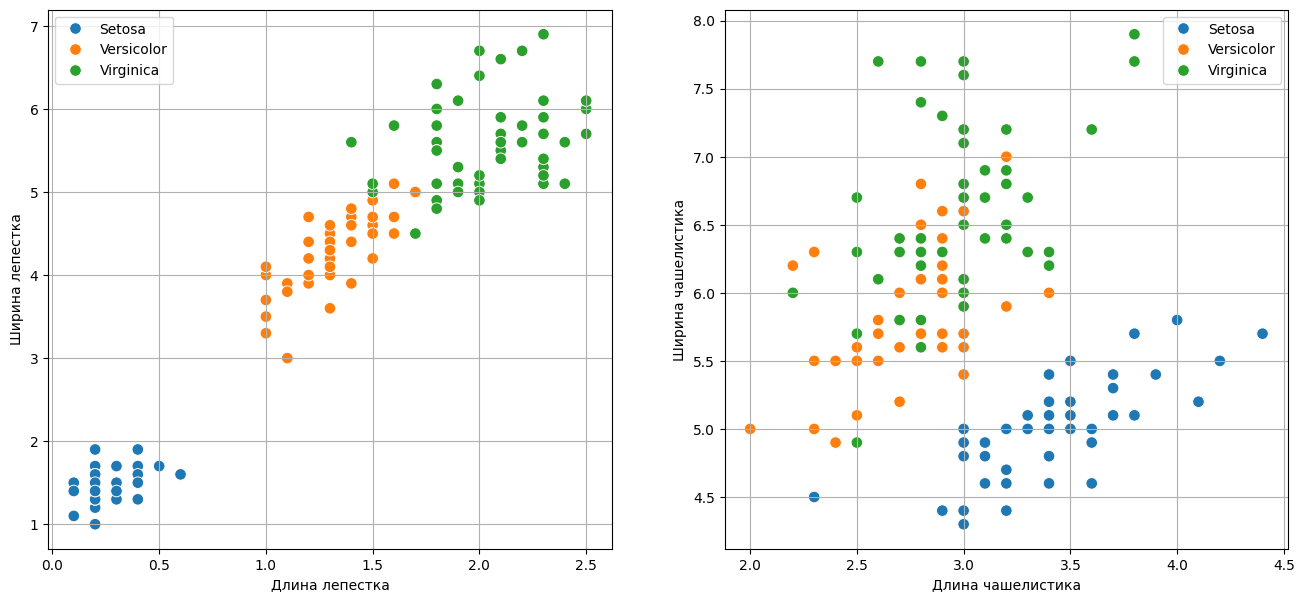

In [24]:
#Объвляем фигуру из двух графиков и ее размер
plt.figure(figsize=(16,7))

#Левый график
plt.subplot(121)
sns.scatterplot(data=iris,
x = 'petal.width', 
y='petal.length', 
hue='species',
s=70)

plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.legend()
plt.grid()

plt.subplot(122)
sns.scatterplot(data=iris,
x ='sepal.width',
y='sepal.length',
hue='species',
s=70)

plt.xlabel('Длина чашелистика')
plt.ylabel('Ширина чашелистика')
plt.legend()
plt.grid()

2.2.4 Пример

Из графиков видно, что в первом случае классы визуально хорошо отделимы друг от друга, хотя два классе имеют небольшое пересечение. Во втором случае разделить два класса между собой уже намного труднее.

Далее разделим датасет на обучающую и тестовую выборки в соотношении 80:20. Обучающая выборка (training sample) — выборка, по которой производится настройка (оптимизация параметров) модели зависимости. Тестовая (или контрольная) выборка (test sample) — выборка, по которой оценивается качество построенной модели.


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:,: -1], # берем все колонки кроме последней в признаки 
    iris.iloc[:, -1], # последнюю в целевую переменную (класс) 
    test_size=0.2, # размер тестовой выборки 20%
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [26]:
X_train.head()

,sepal.length,sepal.width,petal.length,petal.width
88,5.6,3.0,4.1,1.3
98,5.1,2.5,3.0,1.1
130,7.4,2.8,6.1,1.9
74,6.4,2.9,4.3,1.3
104,6.5,3.0,5.8,2.2


In [27]:
y_train.head()

88     Versicolor
98     Versicolor
130     Virginica
74     Versicolor
104     Virginica
Name: species, dtype: object

In [28]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array(['Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor',
       'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Setosa',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Setosa',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor',
       'Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Setosa'],
      dtype=object)

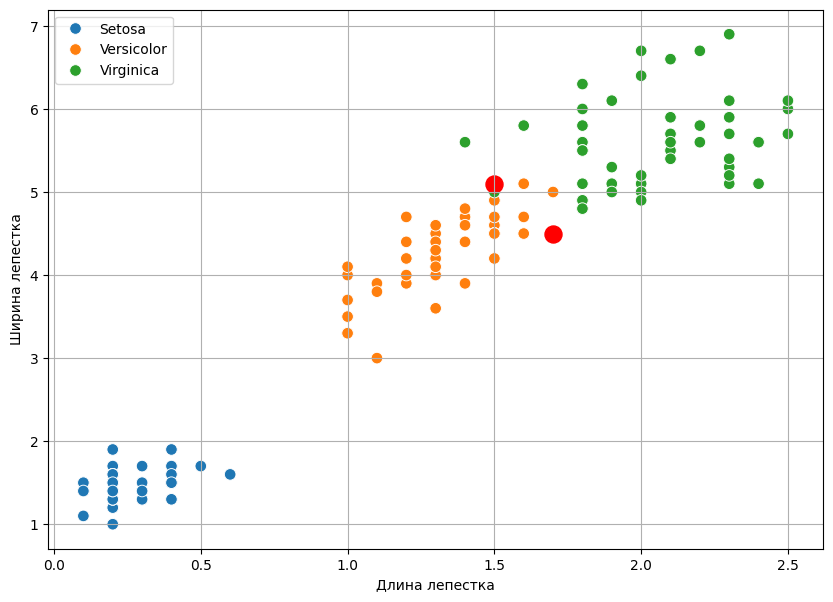

In [36]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=iris,
    x= 'petal.width',
    y='petal.length',
    hue='species',
    s=70)
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i]!= np.array(y_pred)[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

In [34]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, y_pred) : .3}')

accuracy:  0.933


2.3.1 Задание

Для предыдущего примера поэкспериментируйте с параметрами классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте результаты.

In [40]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
iris = pd.read_csv('iris.csv')
iris['species'] = iris['variety']
iris.drop('variety', axis=1, inplace=True)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:,: -1], # берем все колонки кроме последней в признаки 
    iris.iloc[:, -1], # последнюю в целевую переменную (класс) 
    test_size=0.15, # размер тестовой выборки 15%
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127, 4), (23, 4), (127,), (23,))

In [62]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred


array(['Versicolor', 'Setosa', 'Virginica', 'Setosa', 'Virginica',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Virginica', 'Virginica', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Virginica'], dtype=object)

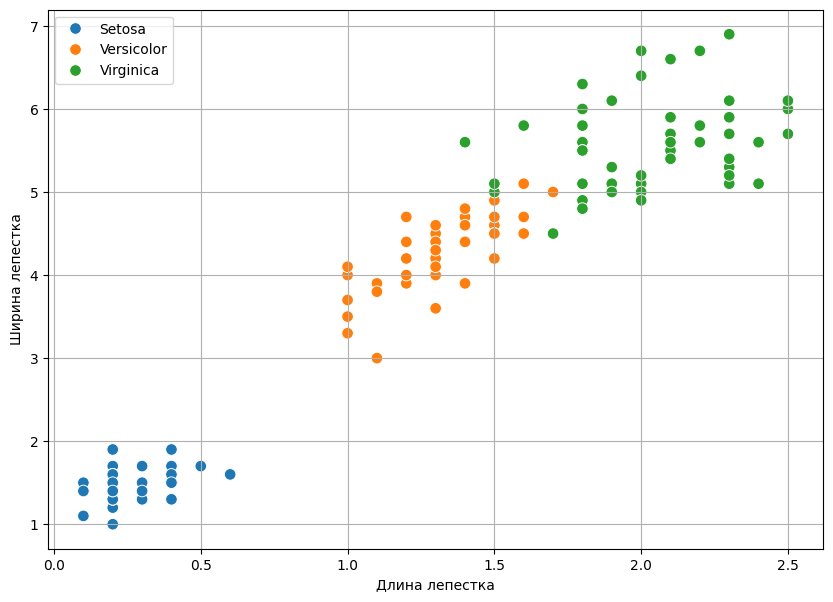

In [63]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=iris,
    x= 'petal.width',
    y='petal.length',
    hue='species',
    s=70)
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i]!= np.array(y_pred)[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

In [64]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, y_pred) : .6}')

accuracy:  1.0


3.3.2 Задание

Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и конвертируйте его в матрицу признаков.

In [75]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [
    {'Имя': 'Андрей', 'Возраст': '35', 'Цвет глаз' : 'Карий'},
    {'Имя': 'Наталья', 'Возраст': '21', 'Цвет глаз' : 'Синий'},
    {'Имя': 'Петр', 'Возраст': '10', 'Цвет глаз' : 'Серый'},
    {'Имя': 'Виктор', 'Возраст': '52', 'Цвет глаз' : 'Карий'},
    {'Имя': 'Елена', 'Возраст': '42', 'Цвет глаз' : 'Синий'},
    {'Имя': 'Василий', 'Возраст': '30', 'Цвет глаз' : 'Зеленый'}
]

vec = DictVectorizer(sparse=False)
features = vec.fit_transform(data_dict)
features

array([[0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.]])